In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler 
import pickle


In [2]:
os.chdir("C:\\Users\\TBRC-lap35\\Desktop\\Assignments\\Linear Regression")

In [3]:
#loading the data set
boston = load_boston()
bos = pd.DataFrame(boston.data,columns = boston.feature_names)
bos1 = pd.DataFrame(boston.target,columns = ['MEDV'])
df = pd.concat([bos,bos1],axis = 1)

In [4]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Exploratory data analysis


In [5]:
#checking null values each column

df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
#finding the summary of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


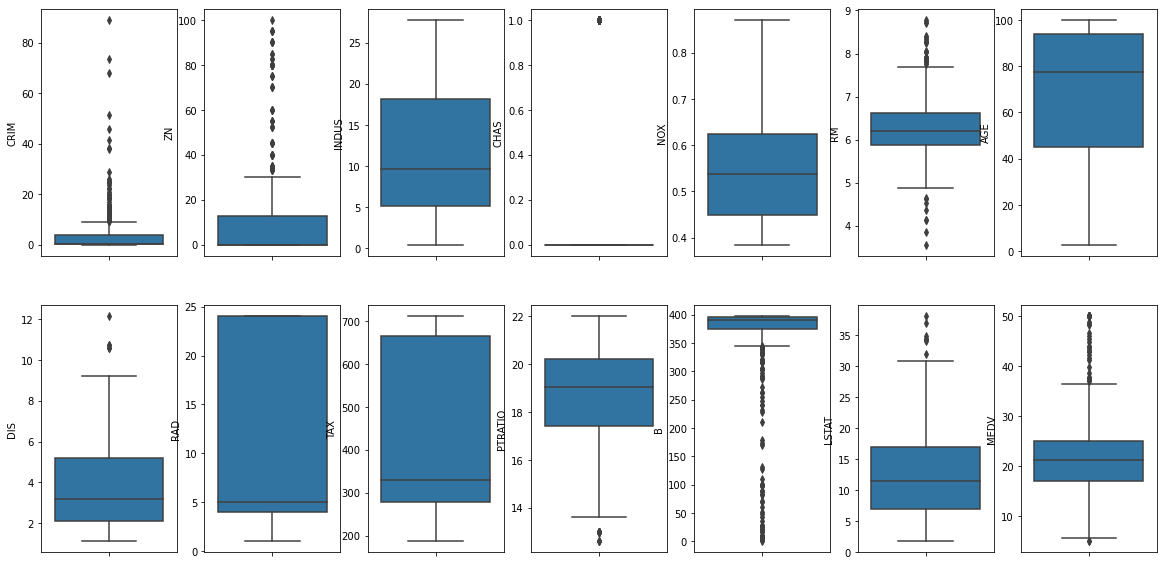

In [7]:
#Plotting box plot for each input data to check information about outliers

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

axs = axs.flatten()
index = 0

for i,j in df.items():
    sns.boxplot(y=i,data = df,ax = axs[index])
    index=index+1

In [8]:
#Columns like CRIM, ZN, RM, B seems to have outliers. Let's remove outliers
#calcutating IQR 
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

upper_limit = q3+(1.5*iqr)
upper_limit

CRIM          9.069639
ZN           31.250000
INDUS        37.465000
CHAS          0.000000
NOX           0.886500
RM            7.730500
AGE         167.650000
DIS           9.820800
RAD          54.000000
TAX        1246.500000
PTRATIO      24.400000
B           427.496250
LSTAT        31.962500
MEDV         36.962500
dtype: float64

In [9]:
#Removning outliers from MEDV column
df = df[~(df['MEDV'] >= 36.962500)]
print(np.shape(df))

(468, 14)


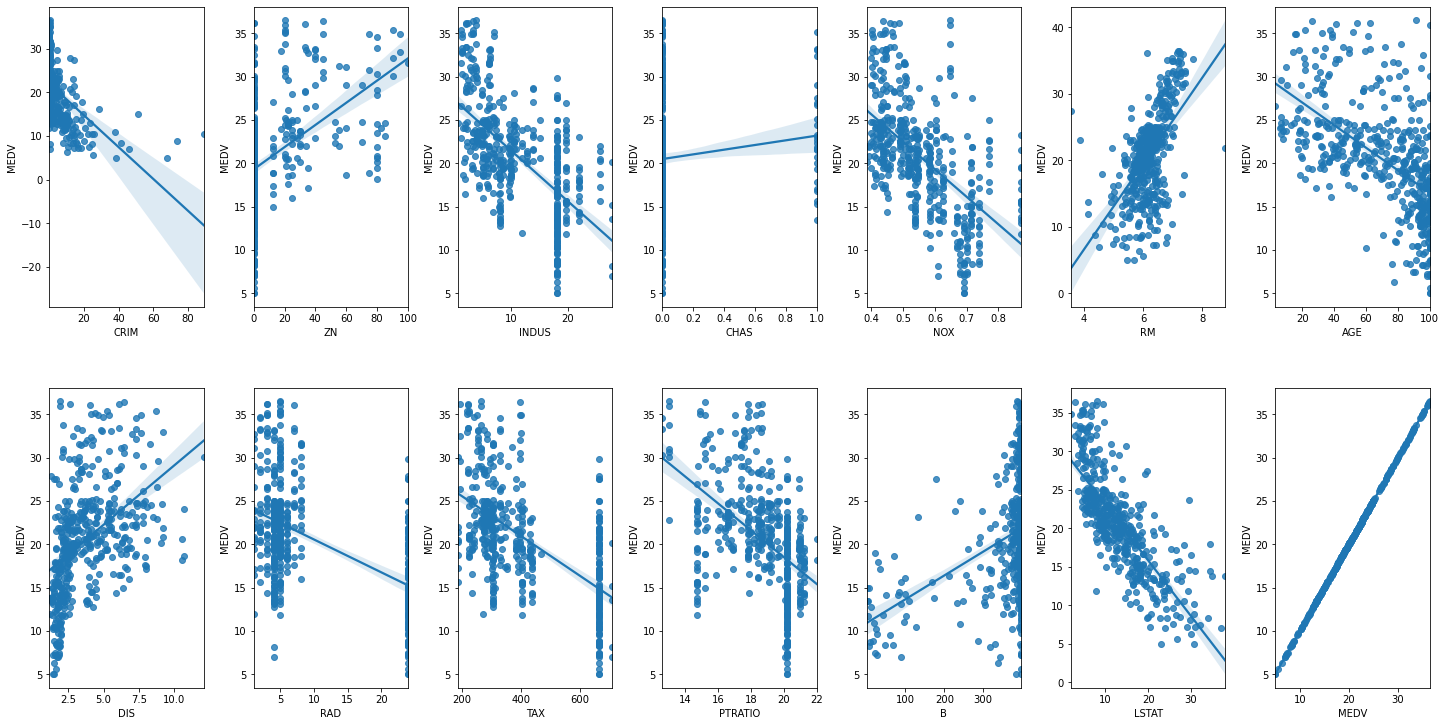

In [10]:
#regression plot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

axs = axs.flatten()
index = 0

for i,j in df.items():
    sns.regplot(x=i,y=df['MEDV'],data=df,ax = axs[index])
    index=index+1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



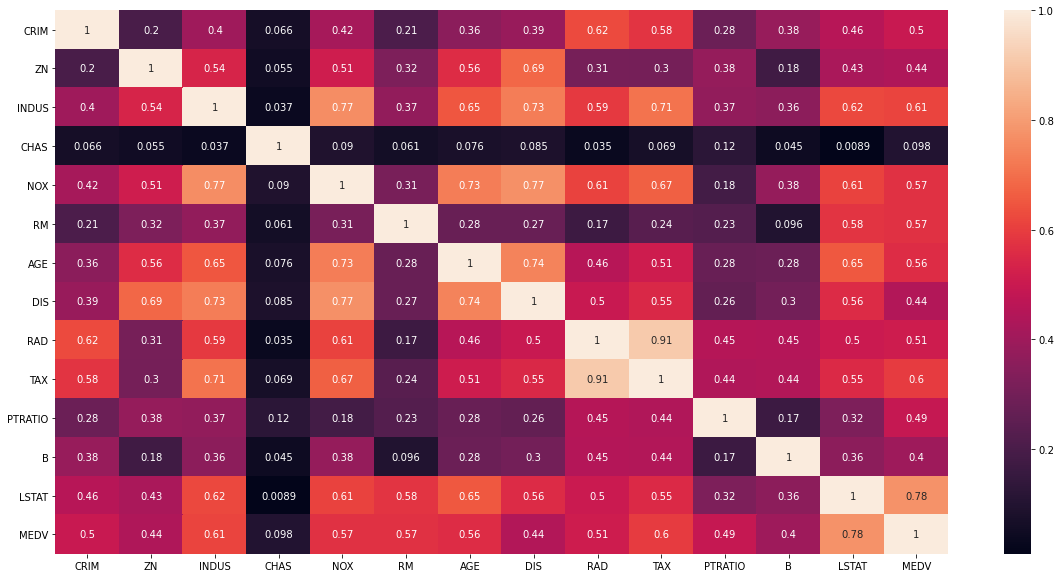

In [11]:
#Heat map for finding correlation between the variables
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr().abs(),annot=True)

In [12]:
#dividing the data into input and target variable
y = df['MEDV']
x = df.drop(columns = ['MEDV','RAD'])

From the above heatmap we can say that there is a strong correlation between TAX and RAD. We are removing the RAD column for the data.

In [13]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(x)
x_new = pd.DataFrame(X_scaled,columns = x.columns)

In [14]:
#variation inflation factor

vif=pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features'] = x.columns
vif

,vif_factor,features
0,1.653698,CRIM
1,2.316619,ZN
2,3.664311,INDUS
3,1.060255,CHAS
4,4.268099,NOX
5,1.688753,RM
6,3.110346,AGE
7,4.144971,DIS
8,3.345611,TAX
9,1.597420,PTRATIO


Here, we have the correlation values for all the features. We don't any VIF greater than 5

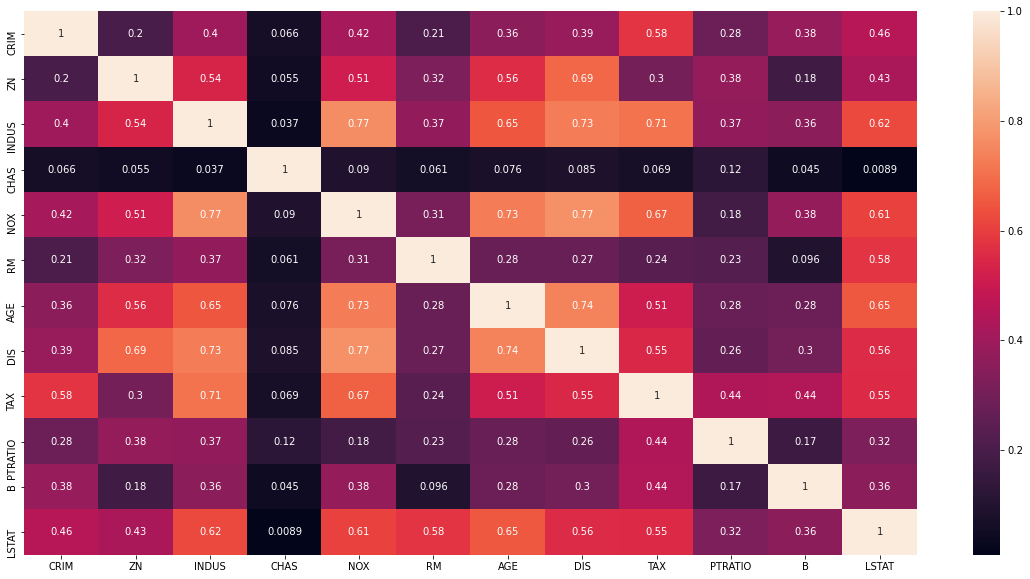

In [15]:
#Heat map for finding correlation between the variables of the new data
plt.figure(figsize=(20,10))
sns.heatmap(data=x_new.corr().abs(),annot=True)

There is no multicollinearity between the inputs

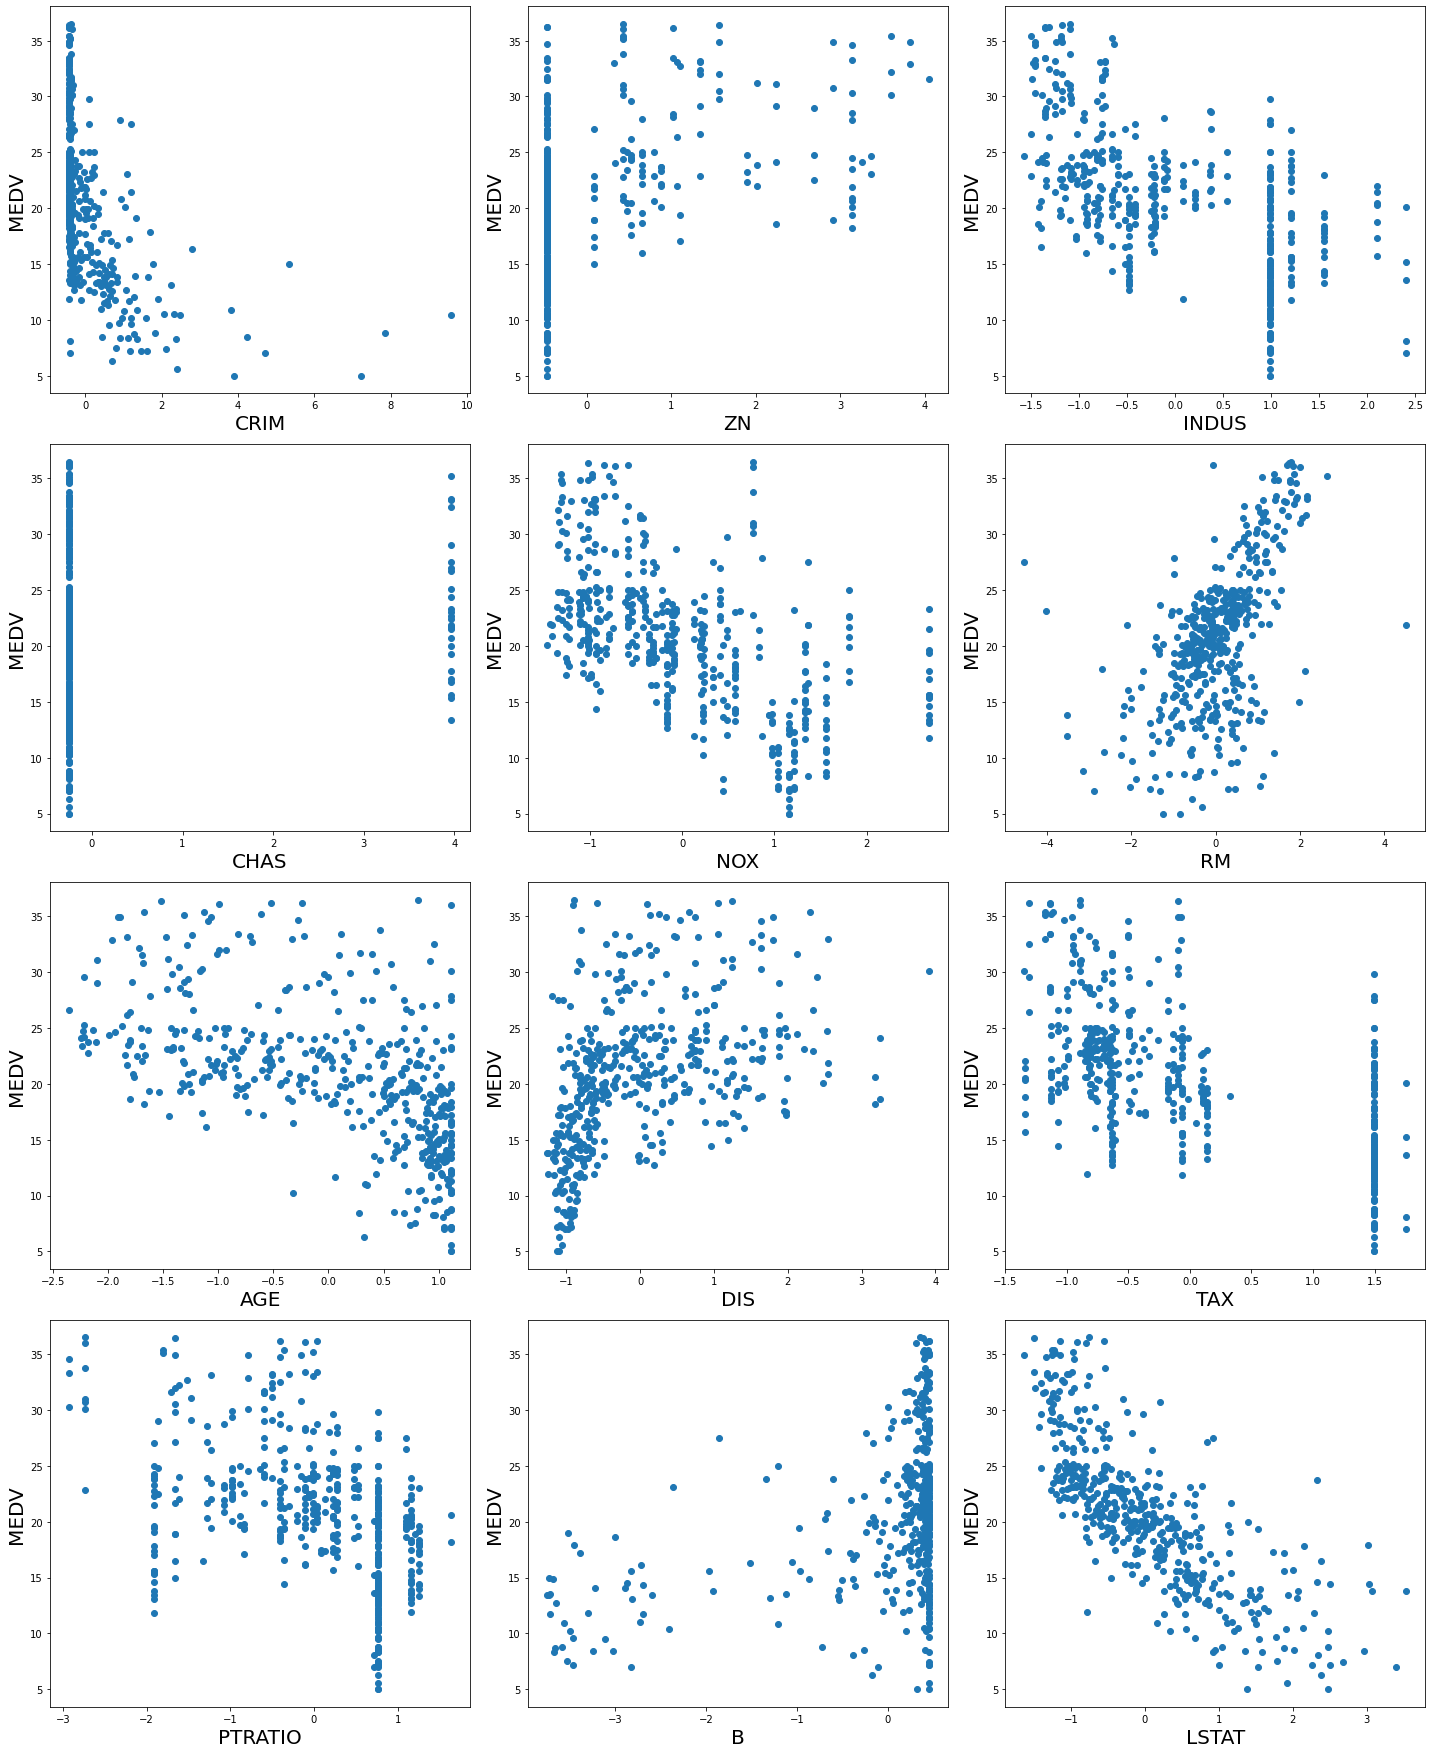

In [16]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x_new:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x_new[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('MEDV',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [17]:
#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.25,random_state=355)

# Developing the Model

In [18]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [19]:
# function to check adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [20]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [21]:
regression.score(x_train,y_train)

0.7479644138021577

In [22]:
adj_r2(x_train,y_train)

0.7390164048247195

In [23]:
regression.score(x_test,y_test)

0.759034242099895

In [24]:
adj_r2(x_test,y_test)

0.7312305008037291